# LR Model Taking EngineSize As Input Parameter



[[1.  2. ]
 [1.  3.6]
 [1.  5.4]
 ...
 [1.  4.4]
 [1.  1.8]
 [1.  5.6]]


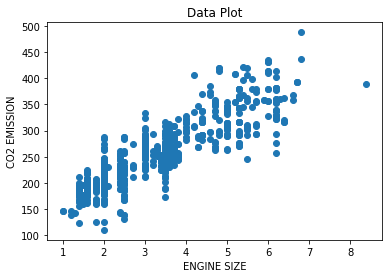

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('FuelConsumption.csv')
m = len(df)
X = df['ENGINESIZE']
y = df['CO2EMISSIONS']
X = np.array(X)
y = np.array(y)
X = X.reshape(m,1)
y = y.reshape(m,1)

t = np.ones(m).reshape(m,1)
X = np.hstack((t,X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

plt.title('Data Plot')
plt.scatter(X_train[:,1:2],y_train)
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.show()

theta_0 =[-0.01796317]
theta_1 =[-0.08357616]


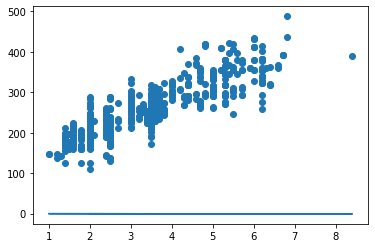

In [90]:
alpha = 0.0001
itr = 10000000

def hypothesis(theta):
    return X_train.dot(theta)

# for representation purpose
def costFunction(theta):
    return (((hypothesis(theta)-y_train).T).dot((hypothesis(theta)-y_train)))/(2*m)

def gradientDescent(theta):
    t = np.full((1,len(X_train)),1)
    s = np.full((1,2),1)
    temp0 = (t.dot(hypothesis(theta)-y_train))*(alpha/m)
    temp1 = (s.dot((X_train.T).dot(hypothesis(theta)-y_train)))*(alpha/m)
    theta[0]=theta[0]-temp0
    theta[1]=theta[1]-temp1

theta = np.array([0.0,0.0]).reshape(2,1)
costFunction(theta)
gradientDescent(theta)
print("theta_0 =" + str(theta[0]))
print("theta_1 =" + str(theta[1]))

model = theta[0] + theta[1] * (X_train[:,1:2])
plt.scatter(X_train[:,1:2],y_train)
plt.plot(X_train[:,1:2],model)
plt.show()